# Analysis notebook
This notebook holds the code to regenerate all figures and statistics in the
paper for connected causal graphs, based on the pickled data files. If you want to restrict the analysis to
connected causal graphs, check out the companion notebook ```connected_analysis.ipynb```.

### Setup
We use the ```qprobing``` package that was written specifically for analyzing the
effectiveness of quantitative probing. The generated data is stored in pickle
files. If you want to generate additional data, check out the python script
```run_experiment.py``` or the shell script ```run_multiple_experiments.py```.

In [1]:
import glob
from qprobing.experiment_evaluator import ExperimentEvaluator
from qprobing.meta_evaluator import MetaEvaluator
from pathlib import Path

In [2]:
pkl_names = glob.glob('pkl/13**/**.**', recursive=True)
print(pkl_names)

['pkl\\13-04_09-59__1000_runs\\0.pkl', 'pkl\\13-04_09-59__1000_runs\\1.pkl', 'pkl\\13-04_09-59__1000_runs\\2.pkl', 'pkl\\13-04_09-59__1000_runs\\3.pkl', 'pkl\\13-04_09-59__1000_runs\\4.pkl', 'pkl\\13-04_09-59__1000_runs\\5.pkl', 'pkl\\13-04_13-28__1000_runs\\0.pkl', 'pkl\\13-04_14-50__1000_runs\\0.pkl', 'pkl\\13-04_14-50__1000_runs\\1.pkl', 'pkl\\13-04_15-05__1000_runs\\0.pkl', 'pkl\\13-04_15-05__1000_runs\\1.pkl', 'pkl\\13-04_15-05__1000_runs\\2.pkl', 'pkl\\13-04_15-17__1000_runs\\0.pkl', 'pkl\\13-04_15-17__1000_runs\\1.pkl', 'pkl\\13-04_15-17__1000_runs\\2.pkl', 'pkl\\13-04_15-17__1000_runs\\3.pkl', 'pkl\\13-04_15-17__1000_runs\\4.pkl', 'pkl\\13-04_15-17__1000_runs\\5.pkl', 'pkl\\13-04_15-17__1000_runs\\6.pkl', 'pkl\\13-04_15-17__1000_runs\\7.pkl', 'pkl\\13-04_15-17__1000_runs\\8.pkl', 'pkl\\13-04_15-17__1000_runs\\9.pkl']


We select which experiment runs we want to analyze. The constraint on the
relative effect differences between true and estimated target effects is used to
filter out some unrealistic results where we probably encountered some numerical
errors in the internal computations.

In [3]:
filter_params_dict={
    'n_nodes': {'lower_bound': 7, 'upper_bound': 7},
    'relative_effect_difference': {'lower_bound': -10, 'upper_bound': 10},
    'true_n_connected_components': {'lower_bound': 1, 'upper_bound': 1},
    'hit_rate': {'lower_bound': 0.5, 'upper_bound': 1, 'n_bins': 50},
}
quantity_names = ['absolute_effect_differences', 'relative_effect_differences', 'n_edge_differences']

### Aggregated plots
We use the ```MetaEvaluator``` to create the aggregated plots (aggregation over
hit rate bins).

In [4]:
meta_evaluator = MetaEvaluator.from_multiple_pkls(pkl_names)

In [5]:
meta_evaluator.get_quantity_means(
    quantity_names=quantity_names,
    filter_params_dict=filter_params_dict,
)

c:\Users\D.Gruenbaum\Anaconda3\envs\nprobing\lib\site-packages\numpy\lib\function_base.py:2411: RuntimeWarning: invalid value encountered in _get_evaluator (vectorized)
  outputs = ufunc(*inputs)


In [6]:
png_path = Path('plots')

Saving to plots\mean_connected_absolute_effect_differences.png


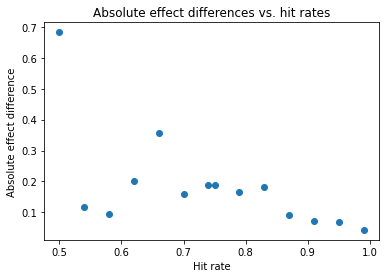

Saving to plots\mean_connected_relative_effect_differences.png


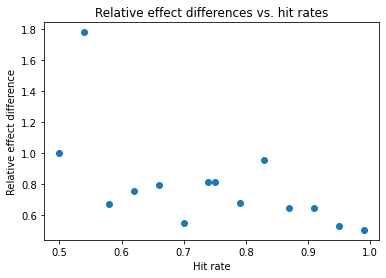

Saving to plots\mean_connected_edge_differences.png


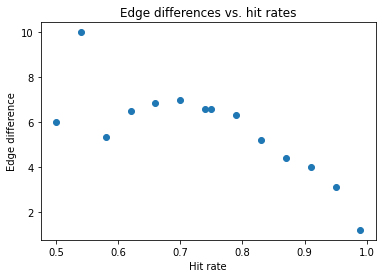

In [7]:
stub_mean = 'mean_'

abs_opts = {
    'x_label': 'Hit rate',
    'y_label': 'Absolute effect difference',
    'title': 'Absolute effect differences vs. hit rates',
    'png_name': png_path / (stub_mean + 'connected_absolute_effect_differences.png')
}
rel_opts = {
    'x_label': 'Hit rate',
    'y_label': 'Relative effect difference',
    'title': 'Relative effect differences vs. hit rates',
    'png_name': png_path / (stub_mean + 'connected_relative_effect_differences.png')
}
edge_opts = {
    'x_label': 'Hit rate',
    'y_label': 'Edge difference',
    'title': 'Edge differences vs. hit rates',
    'png_name': png_path / (stub_mean + 'connected_edge_differences.png')
}

plotting_options = [abs_opts, rel_opts, edge_opts]
meta_evaluator.plot_quantity_means(
    quantity_names=quantity_names,
    filter_params_dict=filter_params_dict,
    calculate_means=False,
    plotting_options=plotting_options,
)

In [8]:
meta_evaluator.get_quantity_data(
    quantity_names=quantity_names,
    filter_params_dict=filter_params_dict,
)

Saving to plots\boxplot_connected_absolute_effect_differences.png


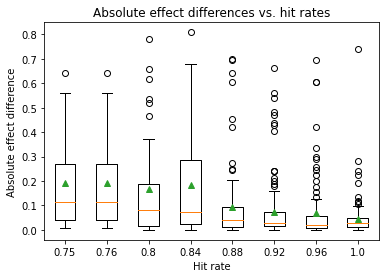

Saving to plots\boxplot_connected_relative_effect_differences.png


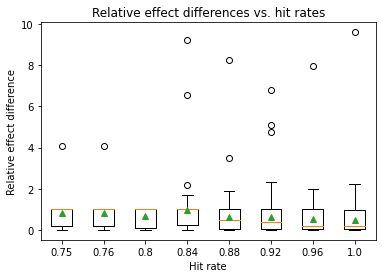

Saving to plots\boxplot_connected_edge_differences.png


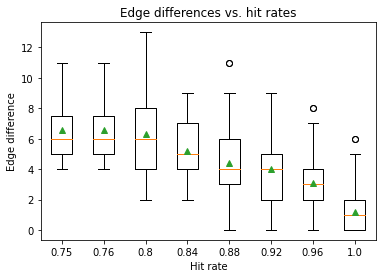

In [9]:
lb_offset = 0.01
min_data_points = 20
stub_boxplot = 'boxplot_'

abs_opts = {
    'x_label': 'Hit rate',
    'y_label': 'Absolute effect difference',
    'title': 'Absolute effect differences vs. hit rates',
    'lb_offset': lb_offset,
    'min_data_points': min_data_points,
    'png_name': png_path / (stub_boxplot + 'connected_absolute_effect_differences.png')
}
rel_opts = {
    'x_label': 'Hit rate',
    'y_label': 'Relative effect difference',
    'title': 'Relative effect differences vs. hit rates',
    'lb_offset': lb_offset,
    'min_data_points': min_data_points,
    'png_name': png_path / (stub_boxplot + 'connected_relative_effect_differences.png')
}
edge_opts = {
    'x_label': 'Hit rate',
    'y_label': 'Edge difference',
    'title': 'Edge differences vs. hit rates',
    'lb_offset': lb_offset,
    'min_data_points': min_data_points,
    'png_name': png_path / (stub_boxplot + 'connected_edge_differences.png')
}

plotting_options = [abs_opts, rel_opts, edge_opts]
meta_evaluator.boxplot_quantity_data(
    quantity_names=quantity_names,
    filter_params_dict=filter_params_dict,
    calculate_data=False,
    plotting_options=plotting_options,
)

### Scatterplots
We use the ```ExperimentEvaluator``` to create the scatterplots without
aggregating over the hit rate bins.

In [10]:
evaluator = ExperimentEvaluator.from_multiple_pkls(pkl_names, filter_params_dict)

In [11]:
evaluator.show_ordinary_results_info()  # exceptional means some error occured during the pipeline
evaluator.show_valid_results_info()

1407 ordinary results vs. 793 exceptional results.
653 in-spec results vs. 754 out-of-spec results.


In [13]:
opacity = 0.2
stub_single = 'single_'

Saving to plots\single_connected_absolute_effect_differences.png


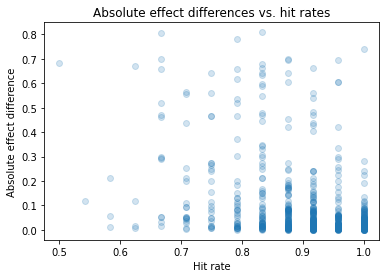

In [14]:
single_abs_opts = {
    'x_label': 'Hit rate',
    'y_label': 'Absolute effect difference',
    'opacity': opacity,
    'title': 'Absolute effect differences vs. hit rates',
    'png_name': png_path / (stub_single + 'connected_absolute_effect_differences.png')
}
evaluator.plot_absolute_effect_differences_vs_hit_rates(single_abs_opts)

Saving to plots\single_connected_relative_effect_differences.png


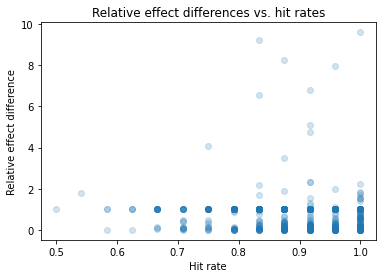

In [15]:
single_rel_opts = {
    'x_label': 'Hit rate',
    'y_label': 'Relative effect difference',
    'opacity': opacity,
    'title': 'Relative effect differences vs. hit rates',
    'png_name': png_path / (stub_single + 'connected_relative_effect_differences.png')
}
evaluator.plot_relative_effect_differences_vs_hit_rates(single_rel_opts)

Saving to plots\single_connected_edge_differences.png


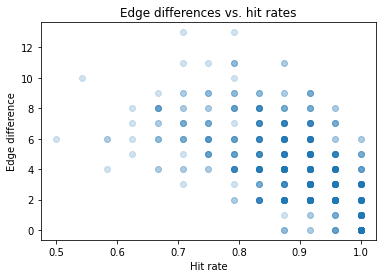

In [16]:
single_edge_opts = {
    'x_label': 'Hit rate',
    'y_label': 'Edge difference',
    'opacity': opacity,
    'title': 'Edge differences vs. hit rates',
    'png_name': png_path / (stub_single + 'connected_edge_differences.png')
}
evaluator.plot_n_edge_differences_vs_hit_rates(single_edge_opts)

The hit rate histogram is created by some quick and dirty code.

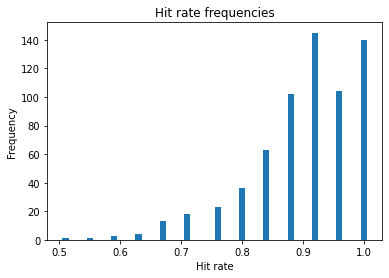

In [17]:
import numpy as np
import matplotlib.pyplot as plt
bins = np.append(meta_evaluator._lower_bounds['hit_rate'], 1)
hit_rates = evaluator._hit_rates
hist_data = np.histogram(hit_rates, bins=bins)
_ = plt.hist(hit_rates, bins=bins, align='right')
plt.title('Hit rate frequencies')
plt.xlabel('Hit rate')
plt.ylabel('Frequency')
fig = plt.gcf()
fig.savefig(png_path / 'connected_hit_rate_frequencies.png')
plt.show()

### Outlier analysis
In order inspect how quantitative probing can fail as a validation approach, we
look for outliers: These are points where all the quantitative probes could be
recovered correctly, but the target effect estimate was off by a large margin.
Two illustrative examples are analyzed more closely.

In [18]:
alarm_indices = [i for i, (diff, hit_rate) in enumerate(zip(evaluator._absolute_effect_differences, evaluator._hit_rates))
                 if diff > 0.2 and hit_rate==1]
print(f"Number of outliers: {len(alarm_indices)}")

Number of outliers: 4


Close up for outlier number 0:
True target effect of x5 on x6: 0.2829732029558314
Difference between true and estimated target effect: -0.2829732029558314
Hit rate: 1.0
Number of probes: 24
True number of connected components: 1
Proposed causal graph (edges required by domain knowledge in red, undirected edges in blue):



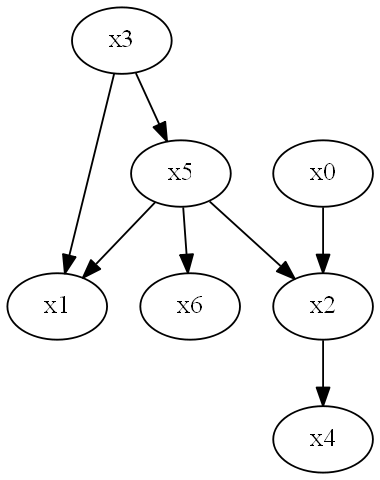

Saving graph to png file.
Knowledge is respected!
Proposed causal graph (edges required by domain knowledge in red, undirected edges in blue):



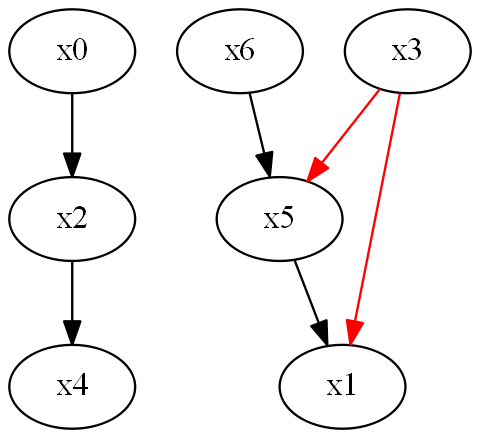

Saving graph to png file.
Knowledge is respected!


In [19]:
idx = 0
result = evaluator._valid_results[alarm_indices[idx]]
print(f"Close up for outlier number {idx}:")
print(f"True target effect of {result.treatment} on {result.outcome}: {result.evaluator.target_effect}")
print(f"Difference between true and estimated target effect: {result.evaluator.effect_difference}")
print(f"Hit rate: {result.hit_rate}")
print(f"Number of probes: {len(result.probes)}")
print(f"True number of connected components: {result.true_n_connected_components}")
path_true = png_path / 'connected_outlier_true.png'
result.show_true_graph(path_true)
path_discovered = png_path / 'connected_outlier_discovered.png'
result.show_discovered_graph(path_discovered)

Close up for outlier number 3:
True target effect of x1 on x2: -0.24025564708061908
Difference between true and estimated target effect: 0.24025564708061908
Hit rate: 1.0
Number of probes: 24
True number of connected components: 1
Proposed causal graph (edges required by domain knowledge in red, undirected edges in blue):



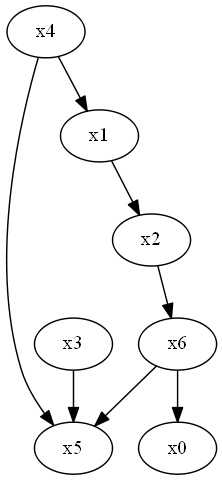

Saving graph to png file.
Knowledge is respected!
Proposed causal graph (edges required by domain knowledge in red, undirected edges in blue):



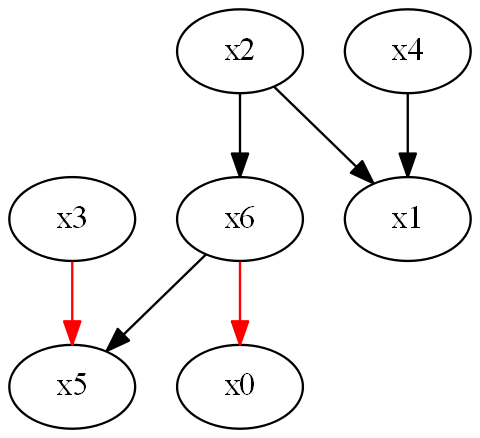

Saving graph to png file.
Knowledge is respected!


In [20]:
idx = 3
result = evaluator._valid_results[alarm_indices[idx]]
print(f"Close up for outlier number {idx}:")
print(f"True target effect of {result.treatment} on {result.outcome}: {result.evaluator.target_effect}")
print(f"Difference between true and estimated target effect: {result.evaluator.effect_difference}")
print(f"Hit rate: {result.hit_rate}")
print(f"Number of probes: {len(result.probes)}")
print(f"True number of connected components: {result.true_n_connected_components}")
path_true = png_path / 'connected_outlier_2_true.png'
result.show_true_graph(path_true)
path_discovered = png_path / 'connected_outlier_2_discovered.png'
result.show_discovered_graph(path_discovered)